Copyright (c) 2019 OERCompBiomed

# Unsupervised learning

**Unsupervised** learning is a branch of machine learning that learns from data that has not been labelled, classified, or categorized (as in **supervised** learning). Unsupervised learning identifies commonalities or previously unknown patterns in the data. The goal for unsupervised learning can be to model the underlying structure or distribution in the data in order to learn more about the data.

Using unsupervised learning to discover inherent groupings in the data is often denoted **clustering**, for which [K-means](https://en.wikipedia.org/wiki/K-means_clustering) is a prominent class of algorithms for splitting data into groups according to similarity, employing an iterative refinement technique to attain an optimal solution. This will also result in a partitioning of the data space into [Voronoi cells](https://en.wikipedia.org/wiki/Voronoi_diagram), that can be usede for cluster prediction of new data points.

## What is K-means?

Illustrative example adapted from: http://www.bigendiandata.com/2017-04-18-Jupyter_Customer360/ (Ian Downard)

[K-means clustering](https://en.wikipedia.org/wiki/Cluster_analysis) aims to group a set of **_objects_** with attributes (**_features_**) in such a way that objects in the same group (or cluster) are more **_similar_** to each other with respect to their attribute values than to objects in other groups. It operates on a table where every entry is an attribute value of a given object. <br>K-means only supports numeric attributes (columns). In python such table is often represented as a Pandas dataframe. A dataframe with two columns can easily be visualized as a scatterplot, where the x-axis is the first column (or attribute) and the y-axis is the second column. 

**For example, here’s a 2 dimensional scatterplot for a dataframe with two columns**

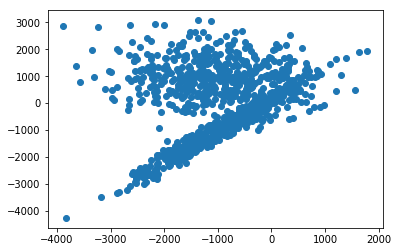

In [1]:
from IPython.display import Image
Image(filename='./assets/scatter-2d.png', width=500)

**If you were to manually group the data in the above graph, how would you do it?**<br>
    You might draw two circles, like this:

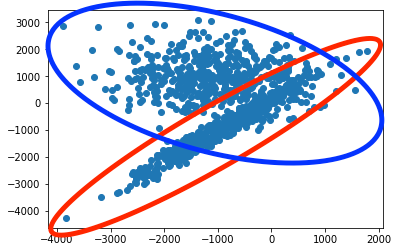

In [2]:
Image(filename='./assets/scatter-2d-circled.png', width=500)

**And in this case the grouping is pretty close to what you get through K-means -** <br>

where the following figure shows how the data is segmented by running K-means on our two dimensional dataset.**

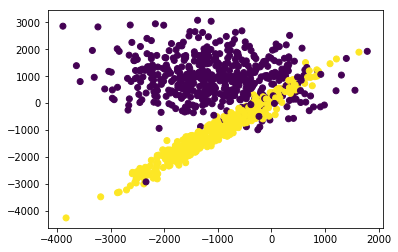

In [3]:
Image(filename='./assets/scatter-2d-segments.png', width=500)

### A real K-means example using synthetic data

(modified from the "Python Data Science Handbook" by Jake VanderPlas)

In [4]:
import os
home = os.path.expanduser('~')  # To make path to local home directory

In [5]:
%matplotlib inline
import matplotlib.pyplot as plt
from sklearn.datasets.samples_generator import make_blobs
from sklearn.cluster import KMeans

# create 50 separable points
X, y = make_blobs(n_samples=100, centers=4,
                  random_state=42, cluster_std=1.5)

# Fit the K Means model
model = KMeans(4, random_state=0)
y = model.fit_predict(X)

In [6]:
centroids = model.cluster_centers_

**Plot the input data (without cluster labels)**

In [7]:
# Make a function for common plot formatting
def format_plot(ax, title):
    ax.xaxis.set_major_formatter(plt.NullFormatter())
    ax.yaxis.set_major_formatter(plt.NullFormatter())
    ax.set_xlabel('feature 1', color='black')
    ax.set_ylabel('feature 2', color='black')
    ax.set_title(title, color='black')

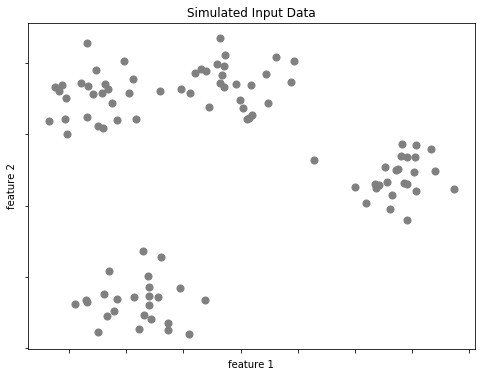

In [8]:
fig, ax = plt.subplots(figsize=(8, 6))
ax.scatter(X[:, 0], X[:, 1], s=50, color='gray')

# format the plot
format_plot(ax, 'Simulated Input Data')

plt.show()
# fig.savefig('assets/k-means-clustering-1.png')

**Plot the data with color-coded cluster labels and star-shaped cluster centroids**

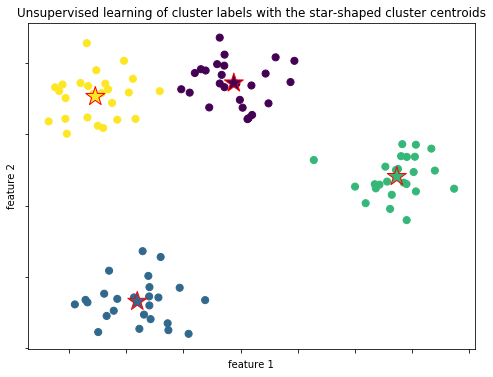

In [9]:
fig, ax = plt.subplots(figsize=(8, 6))
ax.scatter(X[:, 0], X[:, 1], s=50, c=y, cmap='viridis')
ax.scatter(centroids[:, 0], centroids[:, 1], marker='*', s=400, c=range(4), cmap='viridis', edgecolors = 'red')

# format the plot
format_plot(ax, 'Unsupervised learning of cluster labels with the star-shaped cluster centroids')

plt.show()
# fig.savefig('assets/k-means-clustering-2.png')

### Visualizing K-means clusters in 3D using the interactive tool  [`plotly`](https://github.com/plotly/plotly.py)
Plotly is an interactive, open-source, and browser-based graphing library for Python

The above plots were created by clustering two attribute columns, only. There could have been other columns in our data set, but we just used two columns. If we want to use an additional column as a clustering feature we would want to visualize the cluster over three dimensions. <br>Here is an example that shows how to visualize cluster shapes with a 3D scatter/mesh plot in a Jupyter notebook using [make_classification](https://scikit-learn.org/stable/modules/generated/sklearn.datasets.make_classification.html) to generate data and plotly for visualization.

In [10]:
# Initialize plotting library and functions for 3D scatter plots 
from sklearn.datasets import make_blobs
from sklearn.datasets import make_gaussian_quantiles
from sklearn.datasets import make_classification, make_regression
#from sklearn.externals import six
import six
import pandas as pd
import numpy as np
import argparse
import json
import re
import os
import sys
import plotly
import plotly.graph_objs as go
plotly.offline.init_notebook_mode()

def rename_columns(df, prefix='x'):
    """
    Rename the columns of a dataframe to have X in front of them

    :param df: data frame we're operating on
    :param prefix: the prefix string
    """
    df = df.copy()
    df.columns = [prefix + str(i) for i in df.columns]
    return df

In [11]:
# Create an artificial dataset with 3 clusters for 3 feature columns
X, Y = make_classification(n_samples=100, n_classes=3, n_features=3, n_redundant=0, n_informative=3,
                             scale=1000, n_clusters_per_class=1)
df = pd.DataFrame(X)
# rename X columns
df = rename_columns(df)
# and add the Y
df['y'] = Y
df.head(3)

x0           x1           x2  y
0  1169.690690 -2100.832148   525.505027  2
1  2282.804347  -392.358685  1854.882820  2
2  -565.280516    15.158499  2825.512708  0

In [12]:
# Visualize cluster shapes in 3D

cluster1=df.loc[df['y'] == 0]
cluster2=df.loc[df['y'] == 1]
cluster3=df.loc[df['y'] == 2]

scatter1 = dict(
    mode = "markers",
    name = "Cluster 1",
    type = "scatter3d",    
    x = cluster1.values[:,0], y = cluster1.values[:,1], z = cluster1.values[:,2],
    marker = dict( size=2, color='green')
)
scatter2 = dict(
    mode = "markers",
    name = "Cluster 2",
    type = "scatter3d",    
    x = cluster2.values[:,0], y = cluster2.values[:,1], z = cluster2.values[:,2],
    marker = dict( size=2, color='blue')
)
scatter3 = dict(
    mode = "markers",
    name = "Cluster 3",
    type = "scatter3d",    
    x = cluster3.values[:,0], y = cluster3.values[:,1], z = cluster3.values[:,2],
    marker = dict( size=2, color='red')
)
cluster1 = dict(
    alphahull = 5,
    name = "Cluster 1",
    opacity = .1,
    type = "mesh3d",    
    x = cluster1.values[:,0], y = cluster1.values[:,1], z = cluster1.values[:,2],
    color='green', showscale = True
)
cluster2 = dict(
    alphahull = 5,
    name = "Cluster 2",
    opacity = .1,
    type = "mesh3d",    
    x = cluster2.values[:,0], y = cluster2.values[:,1], z = cluster2.values[:,2],
    color='blue', showscale = True
)
cluster3 = dict(
    alphahull = 5,
    name = "Cluster 3",
    opacity = .1,
    type = "mesh3d",    
    x = cluster3.values[:,0], y = cluster3.values[:,1], z = cluster3.values[:,2],
    color='red', showscale = True
)
layout = dict(
    title = 'Interactive Cluster Shapes in 3D',
    scene = dict(
        xaxis = dict( zeroline=True ),
        yaxis = dict( zeroline=True ),
        zaxis = dict( zeroline=True ),
    )
)
fig = dict( data=[scatter1, scatter2, scatter3, cluster1, cluster2, cluster3], layout=layout )
# Use py.iplot() for IPython notebook
plotly.offline.iplot(fig, filename='mesh3d_sample')

You can interact with that 3D graph with click-drag or mouse wheel to zoom.

## Another example using synthetic 2D data of blobs
(modified from the book/GitHub repository by Aurélien Geron _Hands-On Machine Learning with Scikit-Learn and TensorFlow_ - https://github.com/ageron/handson-ml2)

In [13]:
from sklearn.datasets import make_blobs

In [14]:
blob_centers = np.array(
    [[ 0.2,  2.3],
     [-1.5 ,  2.3],
     [-2.8,  1.8],
     [-2.8,  2.8],
     [-2.8,  1.3]])
blob_std = np.array([0.4, 0.3, 0.1, 0.1, 0.1])

In [15]:
X, y = make_blobs(n_samples=2000, centers=blob_centers,
                  cluster_std=blob_std, random_state=42)

In [16]:
def plot_clusters(X, y=None):
    if y==None:
        plt.scatter(X[:, 0], X[:, 1], c='k', s=1)
    else:
        plt.scatter(X[:, 0], X[:, 1], c=y, s=1)        
    plt.xlabel("$x_1$", fontsize=14)
    plt.ylabel("$x_2$", fontsize=14, rotation=90)

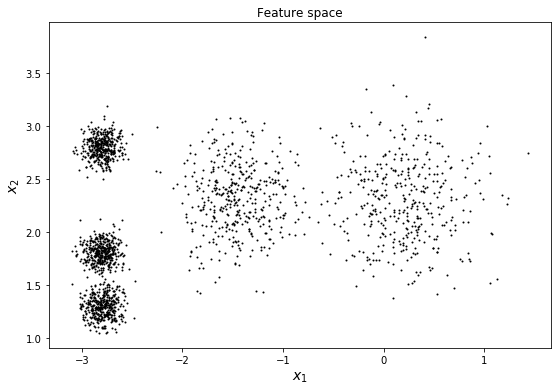

In [17]:
plt.figure(figsize=(9, 6))
plot_clusters(X)
plt.title('Feature space')
plt.show()

#### Train a K-means classifier and predict data sample assignment

In [18]:
from sklearn.cluster import KMeans

In [19]:
K = 5
kmeans = KMeans(n_clusters=K, random_state=42)
y_pred = kmeans.fit_predict(X)

In [20]:
y_pred is kmeans.labels_

True

Each data sample was assigned to one of the K clusters. How to check cluster-wise belonging and cardinality of each cluster:

In [21]:
# Using np.bincount()
print(len(y_pred))
print(y_pred)
np.bincount(y_pred)

2000
[2 1 3 ... 1 2 4]


array([401, 392, 403, 403, 401], dtype=int64)

In [22]:
# or, using collections and Counter (this behaves like a dictionary)
import collections
collections.Counter(y_pred)

Counter({2: 403, 1: 392, 3: 403, 0: 401, 4: 401})

In [23]:
# or, converting to a Pandas data frame and using value_counts()
import pandas as pd
import numpy as np

df = pd.DataFrame({'data': y_pred})
print(df['data'].value_counts())

3    403
2    403
4    401
0    401
1    392
Name: data, dtype: int64


In [24]:
# or, Pandas series
pd.Series(y_pred).value_counts()

3    403
2    403
4    401
0    401
1    392
dtype: int64

In [25]:
# or use np.unique()
uniq, cnts = np.unique(y_pred, return_counts=True)
print(uniq)
print(cnts)

[0 1 2 3 4]
[401 392 403 403 401]


In [26]:
# or, using dictionary comprehension
counts = {int(value): list(y_pred).count(value) for value in set(y_pred)}
print(counts)

{0: 401, 1: 392, 2: 403, 3: 403, 4: 401}


In [27]:
# or, using np.where()
n = {i:len([j for j in np.where(y_pred==i)[0]]) for i in set(y_pred)}
iy = {i:[j for j in np.where(y_pred==i)[0]] for i in set(y_pred)}
print(n)
# Cluster-wise sample assignments
#print(iy) 

{0: 401, 1: 392, 2: 403, 3: 403, 4: 401}


The following K centroids (cluster centers) were estimated:

In [28]:
kmeans.cluster_centers_

array([[-2.79244799,  1.2973862 ],
       [ 0.20925539,  2.30351618],
       [-2.79846237,  2.80004584],
       [-1.4453407 ,  2.32051326],
       [-2.80372723,  1.80873739]])

**We can also predict the labels (cluster belonging) of new instances**:

In [29]:
X_new = np.array([[0, 2], [3, 2], [-3, 3], [-3, 2.5]])
kmeans.predict(X_new)

array([1, 1, 2, 2])

### Visualizing the decision boundaries -  _Voronoi_ diagrams

Define initially some utility functions for plotting

In [30]:
def plot_data(X):
    plt.plot(X[:, 0], X[:, 1], 'k.', markersize=2)

def plot_centroids(centroids, weights=None, circle_color='w', cross_color='k'):
    if weights is not None:
        centroids = centroids[weights > weights.max() / 10]
    plt.scatter(centroids[:, 0], centroids[:, 1],
                marker='o', s=30, linewidths=8,
                color=circle_color, zorder=10, alpha=0.9)
    plt.scatter(centroids[:, 0], centroids[:, 1],
                marker='x', s=50, linewidths=50,
                color=cross_color, zorder=11, alpha=1)

def plot_decision_boundaries(clusterer, X, resolution=1000, show_centroids=True,
                             show_xlabels=True, show_ylabels=True):
    mins = X.min(axis=0) - 0.1
    maxs = X.max(axis=0) + 0.1
    xx, yy = np.meshgrid(np.linspace(mins[0], maxs[0], resolution),
                         np.linspace(mins[1], maxs[1], resolution))
    Z = clusterer.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)

    plt.contourf(Z, extent=(mins[0], maxs[0], mins[1], maxs[1]),
                cmap="Pastel2")
    plt.contour(Z, extent=(mins[0], maxs[0], mins[1], maxs[1]),
                linewidths=1, colors='k')
    plot_data(X)
    if show_centroids:
        plot_centroids(clusterer.cluster_centers_)

    if show_xlabels:
        plt.xlabel("$x_1$", fontsize=14)
    else:
        plt.tick_params(labelbottom=False)
    if show_ylabels:
        plt.ylabel("$x_2$", fontsize=14, rotation=90)
    else:
        plt.tick_params(labelleft=False)

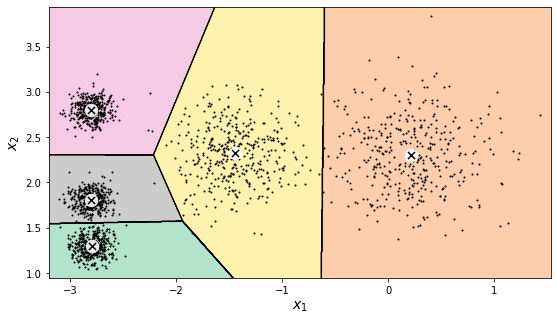

In [31]:
plt.figure(figsize=(9, 5))
plot_decision_boundaries(kmeans, X)
plt.savefig('%s/prj/Seili-2019/results/2.0_voronoi_plot.pdf' % (home), dpi=300)
plt.show()

## More details on the K-means algorithm

The K-Means algorithm is one of the fastest clustering algorithms, but also one of the simplest:
* First initialize $k$ centroids randomly: $k$ distinct instances are chosen randomly from the dataset and the centroids are placed at their locations.
* Repeat until convergence (i.e., until the centroids stop moving):
    * Assign each instance to the closest centroid.
    * Update the centroids to be the mean of the instances that are assigned to them.

The `KMeans` class applies an optimized algorithm by default. To get the original K-Means algorithm (for didactic purposes), you must set `init="random"`, `n_init=1`and `algorithm="full"`. These hyperparameters are explained below.

We will run the K-Means algorithm for 1, 2 and 3 iterations, to see how the centroids move around:

In [32]:
kmeans_iter1 = KMeans(n_clusters=5, init="random", n_init=1,
                     algorithm="full", max_iter=1, random_state=1)
kmeans_iter2 = KMeans(n_clusters=5, init="random", n_init=1,
                     algorithm="full", max_iter=2, random_state=1)
kmeans_iter3 = KMeans(n_clusters=5, init="random", n_init=1,
                     algorithm="full", max_iter=3, random_state=1)
kmeans_iter1.fit(X)
kmeans_iter2.fit(X)
kmeans_iter3.fit(X)

KMeans(algorithm='full', copy_x=True, init='random', max_iter=3, n_clusters=5,
       n_init=1, n_jobs=None, precompute_distances='auto', random_state=1,
       tol=0.0001, verbose=0)

... and do the plotting

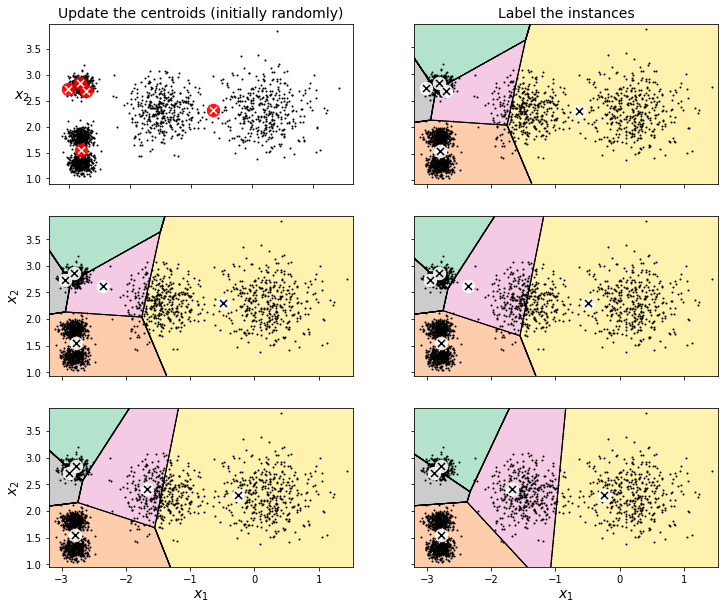

In [33]:
plt.figure(figsize=(12, 10))

plt.subplot(321)
plot_data(X)
plot_centroids(kmeans_iter1.cluster_centers_, circle_color='r', cross_color='w')
plt.ylabel("$x_2$", fontsize=14, rotation=0)
plt.tick_params(labelbottom=False)
plt.title("Update the centroids (initially randomly)", fontsize=14)

plt.subplot(322)
plot_decision_boundaries(kmeans_iter1, X, show_xlabels=False, show_ylabels=False)
plt.title("Label the instances", fontsize=14)

plt.subplot(323)
plot_decision_boundaries(kmeans_iter1, X, show_centroids=False, show_xlabels=False)
plot_centroids(kmeans_iter2.cluster_centers_)

plt.subplot(324)
plot_decision_boundaries(kmeans_iter2, X, show_xlabels=False, show_ylabels=False)

plt.subplot(325)
plot_decision_boundaries(kmeans_iter2, X, show_centroids=False)
plot_centroids(kmeans_iter3.cluster_centers_)

plt.subplot(326)
plot_decision_boundaries(kmeans_iter3, X, show_ylabels=False)

plt.savefig('%s/prj/Seili-2019/results/2.0_kmeans_algorithm_plot.pdf' % (home), dpi=300)
plt.show()

## Finding the optimal number of clusters 

See also [here](https://en.wikipedia.org/wiki/Determining_the_number_of_clusters_in_a_data_set) and [here](https://stackoverflow.com/questions/15376075/cluster-analysis-in-r-determine-the-optimal-number-of-clusters/15376462#15376462)

Given our generated blob data with 5 blob centers, what if the number of clusters was set to a lower or greater value than K=5?

In [34]:
def plot_clusterer_comparison(clusterer1, clusterer2, X, title1=None, title2=None):
    clusterer1.fit(X)
    clusterer2.fit(X)

    plt.figure(figsize=(10, 3.2))

    plt.subplot(121)
    plot_decision_boundaries(clusterer1, X)
    if title1:
        plt.title(title1, fontsize=14)

    plt.subplot(122)
    plot_decision_boundaries(clusterer2, X, show_ylabels=False)
    if title2:
        plt.title(title2, fontsize=14)

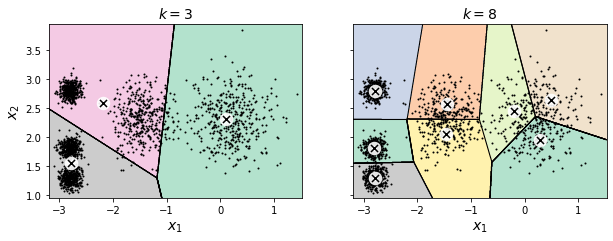

In [35]:
kmeans_k3 = KMeans(n_clusters=3, random_state=42)
kmeans_k8 = KMeans(n_clusters=8, random_state=42)

plot_clusterer_comparison(kmeans_k3, kmeans_k8, X, "$k=3$", "$k=8$")
plt.show()

**The silhouette score**:

One heuristic approach to decide on the optimal number of clusters is to look at the [_silhouette score_](https://en.wikipedia.org/wiki/Silhouette_(clustering)), which is the mean _silhouette coefficient_ over all the data samples. A sample's silhouette coefficient is equal to $(b - a)/\max(a, b)$ where $a$ is the mean distance to the other samples in the same cluster (it is the _mean intra-cluster distance_), and $b$ is the _mean nearest-cluster distance_, that is the mean distance to the samples of the next closest cluster (defined as the one that minimizes $b$, excluding the samples's own cluster). The silhouette coefficient can vary between -1 and +1: a coefficient close to +1 means that the sample is well inside its own cluster and far from other clusters, while a coefficient close to 0 means that it is close to a cluster boundary, and finally a coefficient close to -1 means that the sample may have been assigned to the wrong cluster.

In our case we will plot the silhouette score as a function of $k$:

In [36]:
from sklearn.metrics import silhouette_score

In [37]:
silhouette_score(X, kmeans.labels_)

0.656578194104489

In [38]:
kmeans_per_k = [KMeans(n_clusters=k, random_state=42).fit(X)
                for k in range(1, 10)]

In [39]:
silhouette_scores = [silhouette_score(X, model.labels_)
                     for model in kmeans_per_k[1:]]

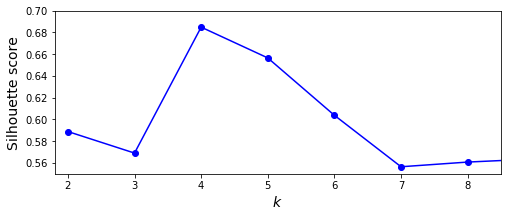

In [40]:
plt.figure(figsize=(8, 3))
plt.plot(range(2, 10), silhouette_scores, "bo-")
plt.xlabel("$k$", fontsize=14)
plt.ylabel("Silhouette score", fontsize=14)
plt.axis([1.8, 8.5, 0.55, 0.7])
plt.show()

The plot tells that $k=4$ is a very good choice, but also shows that $k=5$ is quite good as well.

An even more informative visualization is given when one plot the silhouette coefficient of every sample, sorted by the cluster they are assigned to and by the value of the coefficient. This is called a _silhouette diagram_

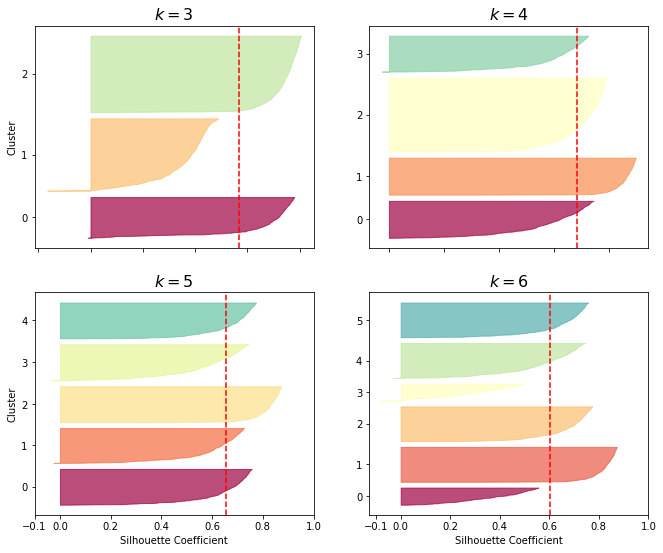

In [41]:
from sklearn.metrics import silhouette_samples
from matplotlib.ticker import FixedLocator, FixedFormatter
import matplotlib as mpl

plt.figure(figsize=(11, 9))

for k in (3, 4, 5, 6):
    plt.subplot(2, 2, k - 2)
    
    y_pred = kmeans_per_k[k - 1].labels_
    silhouette_coefficients = silhouette_samples(X, y_pred)

    padding = len(X) // 30
    pos = padding
    ticks = []
    for i in range(k):
        coeffs = silhouette_coefficients[y_pred == i]
        coeffs.sort()

        color = mpl.cm.Spectral(i / k)
        plt.fill_betweenx(np.arange(pos, pos + len(coeffs)), 0, coeffs,
                          facecolor=color, edgecolor=color, alpha=0.7)
        ticks.append(pos + len(coeffs) // 2)
        pos += len(coeffs) + padding

    plt.gca().yaxis.set_major_locator(FixedLocator(ticks))
    plt.gca().yaxis.set_major_formatter(FixedFormatter(range(k)))
    if k in (3, 5):
        plt.ylabel("Cluster")
    
    if k in (5, 6):
        plt.gca().set_xticks([-0.1, 0, 0.2, 0.4, 0.6, 0.8, 1])
        plt.xlabel("Silhouette Coefficient")
    else:
        plt.tick_params(labelbottom=False)

    plt.axvline(x=silhouette_scores[k - 2], color="red", linestyle="--")
    plt.title("$k={}$".format(k), fontsize=16)

plt.show()

### Using clustering for (color) image segmentation

In [42]:
from matplotlib.image import imread
image = imread(os.path.join("../testdata","ladybug.png"))
image.shape

(533, 800, 3)

In [43]:
X = image.reshape(-1, 3)
kmeans = KMeans(n_clusters=8, random_state=42).fit(X)
segmented_img = kmeans.cluster_centers_[kmeans.labels_]
segmented_img = segmented_img.reshape(image.shape)

In [44]:
segmented_imgs = []
n_colors = (10, 8, 6, 4, 2)
for n_clusters in n_colors:
    kmeans = KMeans(n_clusters=n_clusters, random_state=42).fit(X)
    segmented_img = kmeans.cluster_centers_[kmeans.labels_]
    segmented_imgs.append(segmented_img.reshape(image.shape))

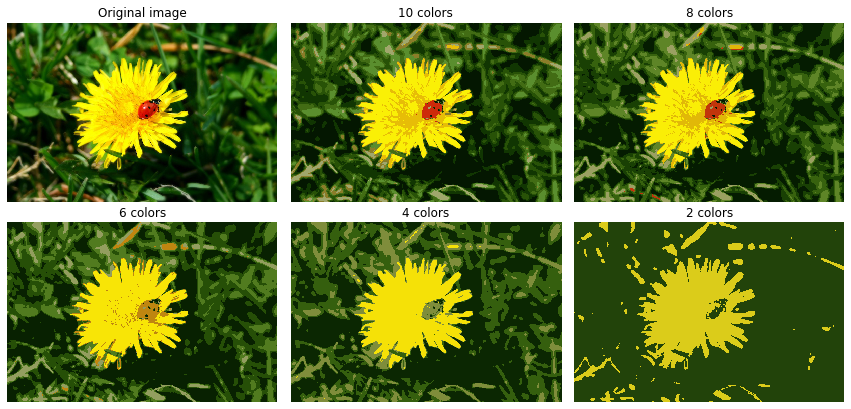

In [45]:
plt.figure(figsize=(15,7))
plt.subplots_adjust(wspace=0.05, hspace=0.1)

plt.subplot(231)
plt.imshow(image)
plt.title("Original image")
plt.axis('off')

for idx, n_clusters in enumerate(n_colors):
    plt.subplot(232 + idx)
    plt.imshow(segmented_imgs[idx])
    plt.title("{} colors".format(n_clusters))
    plt.axis('off')

plt.show()

## Other Clustering Algorithms 

- [Spectral Clustering](https://en.wikipedia.org/wiki/Spectral_clustering) - `from sklearn.cluster import SpectralClustering`
- [DBSCAN](https://en.wikipedia.org/wiki/DBSCAN) - `from sklearn.cluster import DBSCAN` 

### Visualizing K-Means Clusters in N Dimensions

What if you are clustering over more than 3 columns? How do you visualize that? One common approach is to split the 4th dimension data into groups and plot a 3D graph for each of those groups. Another approach is to split all the data into groups based on the K-means cluster value, then apply an aggregation function such as sum or average to all the dimensions in that group, then plot those aggregate values in a heatmap. This approach is described in the following:

We produce an artificial dataset with 12 feature columns to simulate a dataset in which each experimental unit (data point) have been characterized by a variety of attributes, such as different measurements. By plotting the K-means cluster groups and feature columns in a heatmap we can illustrate how we can use machine learning to categorize such a dataset into groups. This in order to obtain better insight to complex data without any prior model of the data generating mechanisms.

In [46]:
import pandas as pd
import plotly
import plotly.graph_objs as go
plotly.offline.init_notebook_mode()

In [47]:
def rename_columns(df, prefix='x'):
    """
    Rename the columns of a dataframe to have X in front of them

    :param df: data frame we're operating on
    :param prefix: the prefix string
    """
    df = df.copy()
    df.columns = [prefix + str(i) for i in df.columns]
    return df

In [48]:
from sklearn.datasets import make_classification, make_regression

# create an artificial dataset with 100 samples from 4 clusters and with 12 features
X, Y = make_classification(n_samples=100, n_classes=4, n_features=12, n_redundant=0, n_informative=12,
                             scale=1000, n_clusters_per_class=1)
df = pd.DataFrame(X)
# ensure all values are positive (this is needed for our medical example)
df = df.abs()
# rename X columns
df = rename_columns(df)
# and the Y
df['y'] = Y
df.head(3).round(2)

x0       x1       x2       x3      x4       x5       x6       x7  \
0  1018.92  2551.66   900.87  3986.21   37.23  3373.48   198.95  1279.34   
1  1351.81  4029.74  1208.24    30.37  736.61  1757.38  2461.27  3287.73   
2   710.79   296.28  1129.57  3711.02    7.84  2153.09  3511.58  2458.69   

        x8       x9      x10      x11  y  
0  1216.96  4295.60  1747.80   173.10  3  
1  1670.31  3706.38  1597.79  4571.97  0  
2   392.48  3190.01  2149.93  1481.95  2

In [49]:
df.tail(3).round(2)

x0       x1       x2       x3       x4       x5       x6       x7  \
97  3013.21  3459.98  2795.71   385.57  3574.27  3239.22  1275.65  2809.55   
98  3093.24   344.60  2248.67  1398.83   683.60    20.68   213.66   927.08   
99  3944.88  1613.95   984.48  1206.60  2099.81   786.77   546.26   675.62   

         x8       x9      x10      x11  y  
97  1407.75   488.20  3775.97   513.59  1  
98  2139.75  1082.62   462.85   718.41  2  
99  2676.55   444.86  2277.32  1846.37  0

In [50]:
# split df into cluster groups
grouped = df.groupby(['y'], sort=True)

# compute sums for every column in every group
print('y = 0,1,2,3 denote group; x0, ... , x11 denote feature; entries are the grouped sum:')
sums = grouped.sum()
sums.round(2)

y = 0,1,2,3 denote group; x0, ... , x11 denote feature; entries are the grouped sum:


x0        x1        x2        x3        x4        x5        x6  \
y                                                                         
0  43153.23  43133.43  43739.88  41024.10  42495.76  49486.14  36677.27   
1  54358.26  50979.52  47303.92  51924.08  57766.49  59045.80  49172.89   
2  41986.84  31605.04  36971.70  48145.55  47677.42  45438.66  34396.54   
3  34699.24  46183.60  40101.52  48961.24  23477.66  45013.50  33676.26   

         x7        x8        x9       x10       x11  
y                                                    
0  55082.64  52564.03  48321.89  45545.95  40316.51  
1  54449.05  40956.20  53505.11  42902.02  40112.84  
2  59265.11  45453.45  34474.70  41595.72  41479.66  
3  48819.26  31427.94  61174.87  35382.83  34194.26

In [51]:
data = [go.Heatmap( z=sums.values.tolist(), 
                   y=['Group A', 'Group B', 'Group C', 'Group D'],
                   x=['Alanine aminotransferase (ALAT)',
                      'Albumin',
                      'Amylase (pancreatic)',
                      'Aspartate aminotransferase (ASAT)',
                      'Calcium',
                      'Cholesterol',
                      'Creatin Kinase (CK)',
                      'Chloride',
                      'C-reactive protein (CRP)',
                      'Creatinine',
                      'Iron',
                      'Glucose',
                      'Potassium',
                      'Lactate dehydrogenase'
                     ],
                   colorscale='Viridis')]

plotly.offline.iplot(data, filename='pandas-heatmap')

**For K-means from scratch and for more advanced examples using K-means clustering, see:**<br>
https://medium.com/machine-learning-algorithms-from-scratch/k-means-clustering-from-scratch-in-python-1675d38eee42 and <br>
https://jakevdp.github.io/PythonDataScienceHandbook/05.11-k-means.html